#### In this notebook we will do the same thing as in the original project, but upgrade it a bit.

In [24]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
import time


options = Options()
options.add_argument("--profile-directory=Default")
# options.add_argument("--headless")
options.add_argument('--no-sandbox') 
options.add_argument('--disable-dev-shm-usage')        
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument("start-maximized")
options.add_argument("--incognito")
options.add_argument("--disable-site-isolation-trials")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36")


driver = webdriver.Chrome(service = Service(executable_path='C:/Users/armon/Downloads/chromedriver_win32/chromedriver.exe'), options=options)

df = pd.DataFrame(columns = ['Title', 'Author', 'Price', 'Rating', 'Format', 'Number of Pages', 'Publication Date', 'ISBN13'])

for loop in range(1,34):

    driver.get(f'https://www.bookdepository.com/bestsellers?page={loop}')
    elements = driver.find_elements(By.CLASS_NAME, "book-item")


    for i in range(len(elements)):

        time.sleep(1)
        elements = driver.find_elements(By.CLASS_NAME, "book-item")
        item = elements[i]
        # img = item.find_element(By.CLASS_NAME, "item-img")  ## problematic if image aint clickable.
        # img.click()

        title_click = item.find_element(By.CLASS_NAME, 'title')
        book_link = title_click.find_element(By.TAG_NAME, "a")
        book_link.click()
        time.sleep(1)

        info = driver.find_element(By.CLASS_NAME, "item-info")

        try:
            title = info.find_element(By.TAG_NAME, "h1").text
        except NoSuchElementException:
            title = np.NAN

        try :
            author = driver.find_element(By.XPATH, '//*[@itemprop="author"]').text
        except NoSuchElementException:
            author = np.NAN

        try:
            price = driver.find_element(By.CLASS_NAME, "sale-price").text
        except NoSuchElementException:
            price = 0

        try:
            rating = driver.find_element(By.XPATH, '//*[@itemprop="ratingValue"]').text
        except NoSuchElementException:
            rating = 0

        info = driver.find_elements(By.CLASS_NAME, "biblio-info")[0].text
        info = info.splitlines()

        format_ = ""
        publication_date_ = ""
        ISBN13_ = ""

        for line in info:
            if "Format" in line:
                format_ = format_ + line
            elif "Publication date" in line:
                publication_date_ = publication_date_ + line
            elif "ISBN13" in line:
                ISBN13_ = ISBN13_ + line


        if len(format_) > 0:
            format = format_.split('|')[0].split("Format ")[1]
        else:
            format = 0

        if '|' in format_:
            num_of_pages = format_.split('|')[1]
        else:
            num_of_pages = 0
            
        publication_date = publication_date_.split('date ')[1]
        ISBN13 = ISBN13_.split('ISBN13 ')[1]


        my_dict = {'Title': [title], 'Author': [author], 'Price': [price], 'Rating': [rating], 'Format': format,
                'Number of Pages': num_of_pages, 'Publication Date': publication_date, 'ISBN13': ISBN13}

        df1 = pd.DataFrame(my_dict)

        df = pd.concat([df.reset_index(drop=True), df1.reset_index(drop=True)], axis = 0)

        driver.back()
driver.quit()


In [26]:
df = df.reset_index(drop=True)
df.sample(10)

,Title,Author,Price,Rating,Format,Number of Pages,Publication Date,ISBN13
834,"The Long Way to a Small, Angry Planet : Wayfar...",Becky Chambers,₪23.95,4.16,Paperback,432 pages,31 Dec 2015,9781473619814
550,The Power of Geography : Ten Maps That Reveal ...,Tim Marshall,₪45.87,4.19,Paperback,432 pages,01 Oct 2021,9781783966028
386,The Story of Art without Men : The instant Sun...,Katy Hessel,₪109.62,0,Hardback,520 pages,08 Sep 2022,9781529151145
873,Wonder,R. J. Palacio,₪38.33,4.39,Paperback,320 pages,23 Jan 2013,9780552565974
962,Caraval: the mesmerising Sunday Times bestsell...,Stephanie Garber,₪35.83,4,Paperback,416 pages,30 Nov 2017,9781473629165
733,The Perks of Being a Wallflower,Stephen Chbosky,₪37.56,4.22,Paperback,240 pages,11 Jan 2013,9781471116148
851,Lost Connections : Why You're Depressed and Ho...,Johann Hari,₪58.76,4.28,Paperback,416 pages,11 Jan 2019,9781408878729
788,Essential Calculus Skills Practice Workbook wi...,Chris Mcmullen,₪45.14,4.42,Paperback,152 pages,16 Aug 2018,9781941691243
442,Assassin's Apprentice,Robin Hobb,₪41.46,4.17,Paperback,400 pages,27 Mar 2014,9780007562251
852,Fighting Fantasy: The Secrets of Salamonis,Steve Jackson,₪37.78,0,Paperback,368 pages,01 Sep 2022,9781407188492


In [27]:
# Let's save it in a csv file just to be safe:

df.to_csv('best_sellers.csv')

##### Now that we got our data, let's check it out a bit, clean, analyze and visualize.

In [28]:
df.dtypes

Title               object
Author              object
Price               object
Rating              object
Format              object
Number of Pages     object
Publication Date    object
ISBN13              object
dtype: object

In [29]:
# let's make 'Rating' a float, price a float (after cleaning a bit), 'number of pages' as integer, 'publication date' as a datetime.
#  Let's start with the rating.

df['Rating'] = df['Rating'].astype(float)

In [30]:
df.dtypes

Title                object
Author               object
Price                object
Rating              float64
Format               object
Number of Pages      object
Publication Date     object
ISBN13               object
dtype: object

In [31]:
# Now we want to change the price as well. But before that, we need to remove the currency sign.

df['Price'] = df['Price'].apply(lambda x : x.split('₪')[1])
df['Price'].head()

0    75.39
1    37.92
2    40.44
3    56.50
4    38.04
Name: Price, dtype: object

In [32]:
# Now let's change it to float

df['Price'] = df['Price'].astype(float)
df.dtypes

Title                object
Author               object
Price               float64
Rating              float64
Format               object
Number of Pages      object
Publication Date     object
ISBN13               object
dtype: object

In [33]:
# Now we off to change the publication date. For that we will create a function that uses the 'time' library:

def transform_date (date):
    date_format  = time.strptime(date, "%d %b %Y")
    return time.strftime("%d/%m/%Y",date_format)


df['Publication Date'] = df['Publication Date'].apply(transform_date)
df.head()

,Title,Author,Price,Rating,Format,Number of Pages,Publication Date,ISBN13
0,Courtiers : The inside story of the Palace pow...,Valentine Low,75.39,0.00,Hardback,384 pages,06/10/2022,9781472290908
1,It Ends With Us: The most heartbreaking novel ...,Colleen Hoover,37.92,4.42,Paperback,384 pages,02/08/2016,9781471156267
2,Verity : The thriller that will capture your h...,Colleen Hoover,40.44,4.43,Paperback,336 pages,20/01/2022,9781408726600
3,TommyInnit Says...The Quote Book,Tom Simons,56.50,0.00,Hardback,208 pages,13/10/2022,9781529427974
4,Seven Husbands of Evelyn Hugo : The Sunday Tim...,Taylor Jenkins Reid,38.04,4.48,Paperback,400 pages,14/10/2021,9781398515697


In [38]:
df['Date Published'] = pd.to_datetime(df['Publication Date'], infer_datetime_format=True)
df.dtypes

Title                       object
Author                      object
Price                      float64
Rating                     float64
Format                      object
Number of Pages             object
Publication Date            object
ISBN13                      object
Date Published      datetime64[ns]
dtype: object

In [41]:
# Now let's drop the publication_date and keep the date published
df.drop(['Publication Date'], inplace = True, axis=1)
df.head()

,Title,Author,Price,Rating,Format,Number of Pages,ISBN13,Date Published
0,Courtiers : The inside story of the Palace pow...,Valentine Low,75.39,0.00,Hardback,384 pages,9781472290908,2022-06-10
1,It Ends With Us: The most heartbreaking novel ...,Colleen Hoover,37.92,4.42,Paperback,384 pages,9781471156267,2016-02-08
2,Verity : The thriller that will capture your h...,Colleen Hoover,40.44,4.43,Paperback,336 pages,9781408726600,2022-01-20
3,TommyInnit Says...The Quote Book,Tom Simons,56.50,0.00,Hardback,208 pages,9781529427974,2022-10-13
4,Seven Husbands of Evelyn Hugo : The Sunday Tim...,Taylor Jenkins Reid,38.04,4.48,Paperback,400 pages,9781398515697,2021-10-14


In [42]:
# Lastly, the Number of pages, we need it to be an integer, but first off extract the num

df['Number of Pages'] = df['Number of Pages'].str.split().str[0]

In [43]:
df.head()

,Title,Author,Price,Rating,Format,Number of Pages,ISBN13,Date Published
0,Courtiers : The inside story of the Palace pow...,Valentine Low,75.39,0.00,Hardback,384,9781472290908,2022-06-10
1,It Ends With Us: The most heartbreaking novel ...,Colleen Hoover,37.92,4.42,Paperback,384,9781471156267,2016-02-08
2,Verity : The thriller that will capture your h...,Colleen Hoover,40.44,4.43,Paperback,336,9781408726600,2022-01-20
3,TommyInnit Says...The Quote Book,Tom Simons,56.50,0.00,Hardback,208,9781529427974,2022-10-13
4,Seven Husbands of Evelyn Hugo : The Sunday Tim...,Taylor Jenkins Reid,38.04,4.48,Paperback,400,9781398515697,2021-10-14


In [44]:
df['Number of Pages'] = df['Number of Pages'].astype('int64')
df.dtypes

ValueError: cannot convert float NaN to integer

In [45]:
df = df[~df['Number of Pages'].isnull()]

In [48]:
df['Number of Pages'] = df['Number of Pages'].astype('int64')
df.dtypes

Title                      object
Author                     object
Price                     float64
Rating                    float64
Format                     object
Number of Pages             int64
ISBN13                     object
Date Published     datetime64[ns]
dtype: object

##### We managed to format it in the datatypes it should be. Let's continue with a bit of more cleaning.

In [50]:
df.isnull().sum()

Title              0
Author             2
Price              0
Rating             0
Format             0
Number of Pages    0
ISBN13             0
Date Published     0
dtype: int64

In [51]:
# We have two null authors, let's obliterate them:
df.dropna(inplace=True)
df.isnull().sum()

Title              0
Author             0
Price              0
Rating             0
Format             0
Number of Pages    0
ISBN13             0
Date Published     0
dtype: int64

In [52]:
# Do we have duplicated ?
len(df)-len(df.drop_duplicates())

0

In [53]:
# let's get a final good look at our dataframe:

df.sample(20)

,Title,Author,Price,Rating,Format,Number of Pages,ISBN13,Date Published
128,The Hobbit & The Lord of the Rings Boxed Set,J. R. R. Tolkien,306.69,4.60,Hardback,1601,9780008376109,2020-01-07
672,Man and His Symbols,Carl G. Jung,40.81,4.17,Paperback,432,9780440351832,1997-01-06
379,Magnolia Parks,Jessa Hastings,69.66,4.13,Paperback,506,9781737281108,2021-07-13
765,Blown Away : From Drug Dealer to Life Bringer:...,Pastor Mick Fleming,66.46,0.00,Hardback,224,9780281086634,2022-09-15
316,The Seven Principles For Making Marriage Work ...,John Gottman,37.65,4.21,Paperback,320,9781841882956,2018-03-22
256,The Psychology of Totalitarianism,Mattias Desmet,72.39,4.62,Hardback,240,9781645021728,2022-06-23
945,"A Radical Awakening : Turn Pain into Power, Em...",Dr Shefali Tsabary,50.43,4.54,Paperback,384,9781529371451,2021-05-18
720,Galatea : The instant Sunday Times bestseller,Madeline Miller,31.44,3.94,Hardback,64,9781526652065,2022-03-03
537,Portraits of Trees of Hong Kong and Southern C...,Sally Bunker,153.19,5.00,Paperback,292,9789888552030,2019-01-04
924,The Book of Form and Emptiness : Winner of the...,Ruth Ozeki,42.84,4.12,Paperback,560,9781838855277,2022-01-06


#### Some EDA

##### What is the priciest book?

In [55]:
df[df['Price'] == df['Price'].max()]

,Title,Author,Price,Rating,Format,Number of Pages,ISBN13,Date Published
848,One Piece Box Set 1: East Blue and Baroque Wor...,Eiichiro Oda,915.58,4.7,Paperback,4720,9781421560748,2013-12-19


##### What is the book with most pages?

In [56]:
df[df['Number of Pages'] == df['Number of Pages'].max()]

,Title,Author,Price,Rating,Format,Number of Pages,ISBN13,Date Published
848,One Piece Box Set 1: East Blue and Baroque Wor...,Eiichiro Oda,915.58,4.7,Paperback,4720,9781421560748,2013-12-19


##### The author with the most books in our bestsellers ?

In [57]:
df['Author'].value_counts().sort_values(ascending=False)

Gege Akutami               18
Colleen Hoover             17
Mo Xiang Tong Xiu          16
Julia Donaldson            13
Tatsuki Fujimoto           11
                           ..
Sabrina Ghayour             1
Brian Bilston               1
Charlotte Stirling-Reed     1
V. E. Schwab                1
Irvin Yalom                 1
Name: Author, Length: 663, dtype: int64

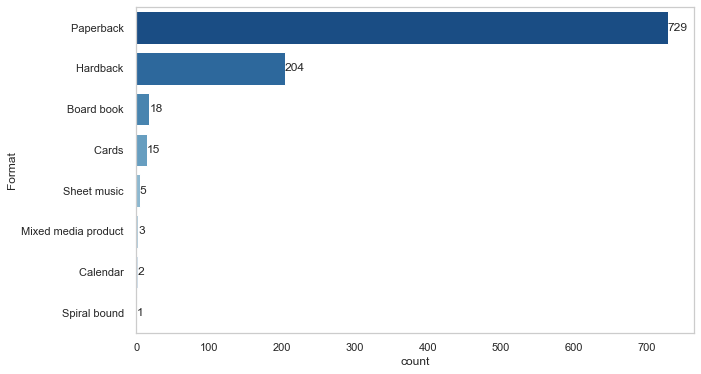

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})


plt.figure(figsize=(10,6))

ax = sns.countplot(data=df, y="Format", order = df["Format"].value_counts().index, palette="Blues_r")
abs_values = df['Format'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

In [80]:
# What's the average price ?

df['Price'].mean()

56.57601842374616

In [84]:
# Which Year had the most best-seller published books?

df['Date Published'].dt.year.value_counts(ascending=False)

2022    355
2021     99
2020     89
2018     67
2019     49
2017     44
2016     42
2015     32
2011     25
2012     22
2014     21
2013     20
2023     15
2010     10
2006      9
2008      8
2003      8
2009      8
1997      8
2005      7
2007      6
2000      6
2002      5
1999      4
1998      3
2004      3
2001      3
1995      2
1991      2
1996      2
1994      1
1993      1
1987      1
Name: Date Published, dtype: int64